In [28]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import csv
import matplotlib.pyplot as plt
import cv2
%matplotlib-inline

UsageError: unrecognized arguments: -inline


In [5]:

# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

# esnure a valid model name was supplied via command line argument
if 'vgg16' not in MODELS.keys():
	raise AssertionError("The --model command line argument should "
		"be a key in the `MODELS` dictionary")

In [6]:
model = "vgg16"
modelNames = ["vgg16","vgg19","inception","xception","resnet"]
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function


if model in ("inception", "xception"):
	inputShape = (299, 299)
	preprocess = preprocess_input

In [7]:

# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
# print("[INFO] loading {}...".format(args["model"]))
models = []

for modelName in modelNames:
    Network = MODELS[modelName]
    models.append(Network(weights="imagenet"))
    


In [26]:

# PROCESSING IMAGES
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
numOfImages = 1
preprocessedImages = []
preprocess = 0
inputShape = (1,1)
for i in range(numOfImages):
    print modelNames[i]
#     if modelNames[i] in ("inception", "xception"):
#         print "1"
    inputShape = (299, 299)
    preprocess = preprocess_input
#     else:
        
        
    
    print("[INFO] loading and pre-processing image...")
    # 17th-century_unknown_painters_-_The_Chef_-_WGA24061
    # image = load_img("the_other_Jan_van_Kessel_-_Grapes,_peaches,_hazelnuts,_quinces,_redcurrants_and_other_fruit,_with_a_brimstone_butterfly,_a_bumblebee_and_other_insects_on_a_stone_capital.jpg", target_size=inputShape)

    # image = load_img("17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg", target_size=inputShape)
    image = load_img("17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg", target_size=inputShape)


    # Lady_Seated_at_a_Virginal,_Vermeer,_The_National_Gallery,_London
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image1 = preprocess(image)
    print image.shape
    
    
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input
    
    print("[INFO] loading and pre-processing image...")
    # 17th-century_unknown_painters_-_The_Chef_-_WGA24061
    # image = load_img("the_other_Jan_van_Kessel_-_Grapes,_peaches,_hazelnuts,_quinces,_redcurrants_and_other_fruit,_with_a_brimstone_butterfly,_a_bumblebee_and_other_insects_on_a_stone_capital.jpg", target_size=inputShape)

    image = load_img("17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg", target_size=inputShape)
#     image = load_img("Paul_de_Vos_-_Running_fox.jpg", target_size=inputShape)


    # Lady_Seated_at_a_Virginal,_Vermeer,_The_National_Gallery,_London
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image2 = preprocess(image)
    print image.shape
    
    preprocessedImages.append([image1,image2])

vgg16
[INFO] loading and pre-processing image...
(1, 299, 299, 3)
[INFO] loading and pre-processing image...
(1, 224, 224, 3)


In [45]:
# classify the image
# print("[INFO] classifying image with '{}'...".format(args["model"]))



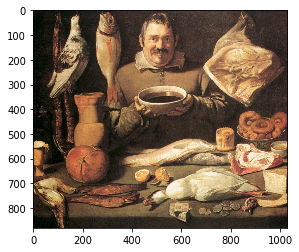

Evaling model:  vgg16
[[(u'n02927161', u'butcher_shop', 0.30979532), (u'n07248320', u'book_jacket', 0.11296165), (u'n02699494', u'altar', 0.061889701), (u'n04476259', u'tray', 0.032555968), (u'n03992509', u"potter's_wheel", 0.030961042)]]
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 1. butcher_shop: 30.98%
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 2. book_jacket: 11.30%
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 3. altar: 6.19%
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 4. tray: 3.26%
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 5. potter's_wheel: 3.10%
Evaling model:  vgg19
[[(u'n02927161', u'butcher_shop', 0.34723148), (u'n04141975', u'scale', 0.056667708), (u'n03992509', u"potter's_wheel", 0.034772273), (u'n07248320', u'book_jacket', 0.034681018), (u'n03447721', u'gong', 0.020951854)]]
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 1. butcher_shop: 34.72%
17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg 2.

AttributeError: 'list' object has no attribute 'flatten'

In [66]:
resultFile = open("results.csv",'wb')
wr = csv.writer(resultFile, dialect='excel')
r = []
for k in range(len(preprocessedImages)):
    
    #Show image
    # load the image via OpenCV, draw the top prediction on the image,
    # and display the image to our screen
    orig = cv2.imread('17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg')
    # (imagenetID, label, prob) = P[0][0]
    # cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
    # 	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    plt.imshow( orig[:,:,[2,1,0]])
    plt.show()
    res = []
    for j in range(len(models)):
        print "Evaling model: ",modelNames[j]
        if modelNames[j] in  ("inception", "xception"):
            preds = models[j].predict(preprocessedImages[k][0])
            P = imagenet_utils.decode_predictions(preds)
        else:
            preds = models[j].predict(preprocessedImages[k][1])
            P = imagenet_utils.decode_predictions(preds)

        # loop over the predictions and display the rank-5 predictions +
        # probabilities to our terminal
        print P
        
        #save data in csv file
        
        
        r.append(P[0])
#         res.append(['17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg '] )
        for (i, (imagenetID, label, prob)) in enumerate(P[0]):
            print '17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg', "{}. {}: {:.2f}%".format(i + 1, label, prob * 100)
#             r.append([ "{}. {}: {:.2f}%".format(i + 1, label, prob * 100)
#                       ])
#         res.append(r)
            
    wr.writerow(r.flatten())
        

In [54]:
'''

# FOR PREPROCESSING SINGLE IMAGE
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
# 17th-century_unknown_painters_-_The_Chef_-_WGA24061
# image = load_img("the_other_Jan_van_Kessel_-_Grapes,_peaches,_hazelnuts,_quinces,_redcurrants_and_other_fruit,_with_a_brimstone_butterfly,_a_bumblebee_and_other_insects_on_a_stone_capital.jpg", target_size=inputShape)

# image = load_img("17th-century_unknown_painters_-_The_Chef_-_WGA24061.jpg", target_size=inputShape)
image = load_img("Paul_de_Vos_-_Running_fox.jpg", target_size=inputShape)


# Lady_Seated_at_a_Virginal,_Vermeer,_The_National_Gallery,_London
image = img_to_array(image)
 
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(image, axis=0)
 
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

'''

[INFO] loading and pre-processing image...


In [55]:
'''
# classify the image
# print("[INFO] classifying image with '{}'...".format(args["model"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
print P
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
'''

[[(u'n02441942', u'weasel', 0.48631275), (u'n02137549', u'mongoose', 0.14511952), (u'n02119022', u'red_fox', 0.094172686), (u'n02115913', u'dhole', 0.085938737), (u'n02120505', u'grey_fox', 0.034389481)]]
1. weasel: 48.63%
2. mongoose: 14.51%
3. red_fox: 9.42%
4. dhole: 8.59%
5. grey_fox: 3.44%


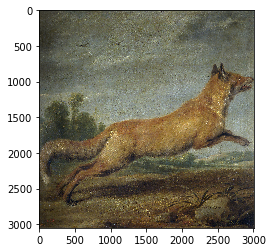

In [56]:
'''

# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread('Paul_de_Vos_-_Running_fox.jpg')
# (imagenetID, label, prob) = P[0][0]
# cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
# 	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt.imshow( orig[:,:,[2,1,0]])
plt.show()

'''